In [ ]:
'''코드 해석'''
# 인공지능을 위한 라이브러리 Tensorflow 와 Keras 를 최신 버전으로 업데이트 합니다.
!pip install --upgrade tensorflow keras

In [ ]:
'''코드 해석'''
# 구글 드라이브를 Colab 으로 불러옵니다.
from google.colab import drive
drive.mount('/content/drive')
!unzip -qq "/content/drive/MyDrive/Xray.zip"

Mounted at /content/drive


In [ ]:
'''코드 해석'''
# 데이터 처리, 시각화, 경로 설정등을 위해 필요한 라이브러리들을 불러옵니다.
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
from PIL import Image

In [ ]:
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ReduceLROnPlateau

import cv2

In [ ]:
# 종속변수가 갖는 두 가지 케이스에 대하여 변수를 생성해둡니다.
# 추후 경로를 설정하는 과정, 종속변수를 구분하는 과정에 활용할 예정
labels = ['Tuberculosis', 'covid', 'normal', 'pneumonia']

In [ ]:
img_size=256
def get_data(data_dir):
    data = []
    labels = ['Tuberculosis', 'covid', 'normal', 'pneumonia']
    for label in labels:
        path = os.path.join(data_dir, label)
  # 'Tuberculosis' : 0 , 'covid' : 1, 'normal' : 2, 'pneumonia':3
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

data_dir = '/content/'
raw_data = get_data(data_dir)

<ipython-input-5-0efd1256b40c>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [ ]:
raw_data.shape # image # class

In [ ]:
df = pd.DataFrame(raw_data)

In [ ]:
df_TB=df[df[1]==0]
TB_array=np.array(df_TB)
TB_dev, TB_test = train_test_split(TB_array, test_size=0.2, random_state=123)
TB_train, TB_val = train_test_split(TB_dev, test_size=0.25, random_state=123)

In [ ]:
df_COV=df[df[1]==1]
df_COV=df_COV.iloc[0:1788,:]
COV_array=np.array(df_COV)
COV_dev, COV_test = train_test_split(COV_array, test_size=0.2, random_state=123)
COV_train, COV_val = train_test_split(COV_dev, test_size=0.25, random_state=123)

In [ ]:
df_NL=df[df[1]==2]
df_NL=df_NL.iloc[0:1788,:]
NL_array=np.array(df_NL)
NL_dev, NL_test = train_test_split(NL_array, test_size=0.2, random_state=123)
NL_train, NL_val = train_test_split(NL_dev, test_size=0.25, random_state=123)

In [ ]:
df_PN=df[df[1]==3]
df_PN=df_PN.iloc[0:1788,:]
PN_array=np.array(df_PN)
PN_dev, PN_test = train_test_split(PN_array, test_size=0.2, random_state=123)
PN_train, PN_val = train_test_split(PN_dev, test_size=0.25, random_state=123)

In [ ]:
TB_train=pd.DataFrame(TB_train)
COV_train=pd.DataFrame(COV_train)
NL_train=pd.DataFrame(NL_train)
PN_train=pd.DataFrame(PN_train)
X_train = pd.concat([TB_train, COV_train, NL_train, PN_train], ignore_index=True)
X_train = pd.concat([TB_train, COV_train, NL_train, PN_train], ignore_index=True)
x_train=np.array(X_train)

In [ ]:
TB_test=pd.DataFrame(TB_test)
COV_test=pd.DataFrame(COV_test)
NL_test=pd.DataFrame(NL_test)
PN_test=pd.DataFrame(PN_test)
X_test = pd.concat([TB_test, COV_test, NL_test, PN_test], ignore_index=True)
x_test=np.array(X_test)

In [ ]:
TB_val=pd.DataFrame(TB_val)
COV_val=pd.DataFrame(COV_val)
NL_val=pd.DataFrame(NL_val)
PN_val=pd.DataFrame(PN_val)
X_val = pd.concat([TB_val, COV_val, NL_val, PN_val], ignore_index=True)
x_val=np.array(X_val)

In [ ]:
'''코드 해석'''
# 데이터 처리, 시각화, 경로 설정등을 위해 필요한 라이브러리들을 불러옵니다.
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
from PIL import Image

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ReduceLROnPlateau

import cv2

In [ ]:
labels = ['Tuberculosis', 'covid', 'normal', 'pneumonia']
img_size = 256

# 데이터 변수화를 위한 함수 구축
# 매개변수(data_dir) : 학습, 검증, 테스트 폴더 위치 까지의 데이터 경로 할당
# get_training_data('/content/drive/MyDrive/chest_xray_all/chest_xray_mini/train')
def get_training_data(data_dir):

    # 전처리가 끝난 데이터를 저장하기 위한 빈 리스트
    data = []

    # 두 가지 라벨('NORMAL', 'PNEUMONIA')에 대해 처리
    for label in labels:

        # 학습, 검증, 테스트 데이터가 포함하는 두 가지 종속변수에 대하여 경로를 확보
        # os.path.join() : 할당된 두 가지 경로를 하나로 연결시켜줍니다.
        path = os.path.join(data_dir, label)
        # path :
        # /content/drive/MyDrive/chest_xray_all/chest_xray_mini/test/NORMAL
        # /content/drive/MyDrive/chest_xray_all/chest_xray_mini/test/PNEUMONIA
        # /content/drive/MyDrive/chest_xray_all/chest_xray_mini/train/NORMAL
        # /content/drive/MyDrive/chest_xray_all/chest_xray_mini/train/PNEUMONIA
        # /content/drive/MyDrive/chest_xray_all/chest_xray_mini/val/NORMAL
        # /content/drive/MyDrive/chest_xray_all/chest_xray_mini/val/PNEUMONIA

        # 두 가지 클래스에 대하여 숫자를 부여합니다.
        # 변수명이 문자열인 경우 보다는 정수형이 관리 측면에서 효율적입니다.
        # 다만 이러한 경우 어떠한 종속변수가 어떠한 숫자로 할당되었는지 기재해둘 필요가 있습니다.
        # 'NORMAL' : 0 , 'PNEUMONIA' : 1
        class_num = labels.index(label)

        # path 변수의 하위 경로에 위치한 '이미지 파일' 들을 반복문을 활용해 불러옵니다.
        # img :
        # ['person1951_bacteria_4882.jpeg',
        #  'person1947_bacteria_4876.jpeg',
        #  'person1954_bacteria_4886.jpeg',
        #   ... ,
        #  'person1949_bacteria_4880.jpeg']
        for img in os.listdir(path):

            # 이미지 전처리 과정이기에 다양한 문제가 발생할 수 있습니다.
            # try 문을 활용하여 발생하는 문제를 예외처리 합니다.
            try:
                # 이미지를 흑백으로 처리하기 위한 과정 입니다.
                # cv2.imread() : 이미지 파일을 불러옵니다.
                # cv2.IMREAD_GRAYSCALE : 이미지를 흑백으로 처리합니다.
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)

                # 이미지의 크기를 조정하는 과정입니다.
                # cv2.resize() : 이미지 크기를 조정합니다.
                resized_arr = cv2.resize(img_arr, (img_size, img_size))

                # 이미지와 이미지의 라벨 정보를 하나로 묶어 data 변수에 할당합니다.
                data.append([resized_arr, class_num])

            # 만약 에러가 생기면 어떠한 문제인지를 print() 를 통해 출력합니다.
            except Exception as e:
                print(e)

    return np.array(data)

In [ ]:
# train = get_training_data('/content/train')
# test = get_training_data('/content/test')
# val = get_training_data('/content/val')
# print(train.shape)
# print(test.shape)
# print(val.shape)

In [ ]:
# pd.DataFrame(train[0][0])

In [ ]:
# # 첫 번째 학습 데이터 Normal 대한 이미지 출력과정 입니다.
# plt.figure(figsize = (5,5))
# plt.imshow(train[0][0], cmap='gray')
# plt.title(labels[train[0][1]])
# plt.grid(False)
# plt.show()

# plt.figure(figsize = (5,5))
# plt.imshow(train[3875][0], cmap='gray')
# plt.title(labels[train[3875][1]])
# plt.grid(False)
# plt.show()

In [ ]:
# 학습 데이터가 갖는 종속변수 기준으로 normal 와 pneumonia 빈도를 확인합니다.

# 학습 데이터 라벨을 따로 저장하기 위한 빈 리스트 선언
train_labels = []

# 학습 데이터를 기준으로 확인하는 과정입니다.
# i :
# train[0] ~ train[399]
for i in X_train[1]:

    # train[0][1]~train[399][1] 의 값이 0 과 같은지 확인합니다.
    # train[0][1]~train[399][1] 는 종속변수의 라벨링이 저장된 위치입니다.
    # 해당 조건문이 맞는경우 Normal 라는 값을 train_labels 에 할당
    if(i == 0):
        train_labels.append("Normal")

    elif(i == 1):
      train_labels.append("Pneumonia")

    elif(i == 2):
      train_labels.append("Covid19")

    else:
        train_labels.append("TURBERCULOSIS")

In [ ]:
# 시각화를 위해 데이터프레임으로 전환
df = pd.DataFrame(train_labels, columns=['variable'])
df

In [ ]:
#sns.countplot()은 다음과 같이 변수의 빈도수를 그래프로 그려줍니다.
sns.countplot(x='variable', data=df)
plt.show()

In [ ]:
# 인공지능을 구현하기 위해서는 데이터를 세분화할 필요가 있습니다.
# 학습, 검증, 테스트 데이터에 대하여 독립변수와 종속변수로 구분 및 변수화를 진행합니다.

xx_train = [] # 학습 데이터의 독립변수
yy_train = [] # 학습 데이터의 종속변수

xx_val = [] # 검증 데이터의 독립변수
yy_val = [] # 검증 데이터의 독립변수

xx_test = [] # 테스트 데이터의 독립변수
yy_test = [] # 테스트 데이터의 종속변수

for feature, label in x_train:
    xx_train.append(feature)
    yy_train.append([label])

for feature, label in x_test:
    xx_test.append(feature)
    yy_test.append([label])

for feature, label in x_val:
    xx_val.append(feature)
    yy_val.append([label])


xx_train = np.array(xx_train) / 255
xx_val = np.array(xx_val) / 255
xx_test = np.array(xx_test) / 255

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

x_train = xx_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(yy_train)
y_train = mlb.fit_transform(y_train)

x_val = xx_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(yy_val)
y_val = mlb.fit_transform(y_val)

x_test = xx_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(yy_test)
y_test = mlb.fit_transform(y_test)

In [ ]:
# ImageDataGenerator() : 이미지에 변화를 주기 위한 함수
# ImageDataGenerator()를 통해 이미지의 어떠한 변화를 줄 것인지 설정합니다.
# 본 데이터는 이미지에 일부 변화를 주도록 합니다.
# 이미지 데이터에 변화를 줌으로 더욱 다양한 학습 데이터를 제공할 수 있도록 합니다.

datagen = ImageDataGenerator(
    rotation_range = 30,  # 이미지를 무작위로 회전시키며 이미지를 생성 (0도 에서 180도 까지)
    zoom_range = 0.2,     # 이미지를 무작위로 확대/축소
    width_shift_range=0.1,   # 이미지를 수평으로 무작위로 이동시킴 (전체 너비의 비율)
    height_shift_range=0.1,  # 이미지를 수직으로 무작위로 이동시킴 (전체 높이의 비율)
    horizontal_flip = True)  # 이미지를 무작위로 수평 뒤집기

datagen.fit(x_train)

# Keras의 ReduceLROnPlateau() 을 통해 학습률(learning rate)을 동적으로 조정합니다.
# monitor = 'val_accuracy' => 모니터링할 지표를 설정합니다. 여기서는 검증 정확도(val_accuracy)를 모니터링합니다.
# patience = 2             => 지정된 수의 에포크 동안 모니터링 지표가 개선되지 않으면 학습률을 감소시킵니다. 여기서는 2 에포크 동안 검증 정확도가 개선되지 않으면 학습률을 감소시킵니다.
# verbose = 1              => 학습률이 감소될 때 메시지를 출력합니다.
# factor = 0.3             => 학습률을 감소시키는 요소입니다. 새 학습률은 기존 학습률에 이 요소를 곱한 값입니다.
# min_lr = 0.000001        => 학습률의 하한입니다. 학습률이 이 값 이하로 떨어지지 않습니다.

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience = 2,
                                            verbose=1,
                                            factor=0.3,
                                            min_lr=0.000001)

In [ ]:
# 1번 모델: 강의록 모델
model = Sequential()

model.add(Conv2D(filters=32 , kernel_size = (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (256,256,1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 4 , activation = 'softmax'))

# 모델에 필요한 레이어를 전부 구축하였다면, 다음은 어떠한 방식으로 학습 최적화 및 평가를 수행할 것 인지 선언합니다.
# 학습 최적화 방식 중 rmsprop 기법을 활용합니다.
# 손실측정 방식에는 이진분류 binary_crossentropy 를 활용합니다.
# 정확도를 측정하는 방식은 정답의 유무만을 측정하는 'accuracy' 를 활용합니다.
model.compile(optimizer = "Adam" , loss = 'CategoricalCrossentropy' , metrics = ['accuracy'])

In [ ]:
# # summary() : 우리가 선언한 모델의 구조를 확인합니다.
# model.summary()

In [ ]:
# AI 모델 학습코드
# model.fit() :
# Keras 모델을 학습시키는 함수입니다. 이 메서드는 학습 데이터, 에포크 수, 검증 데이터 등을 인자로 받습니다.
# history 는 학습 과정에서 측정된 성능정보가 담깁니다.
model = keras.models.load_model('/content/drive/MyDrive/checkpoint.pth')
history = model.fit(datagen.flow(x_train,
                                 y_train,
                                 batch_size = 32), # 원본 데이터에서 무작위로 32개의 데이터를 선택 후 위 변형 옵션을 적용

                    epochs = 0,                                  # 모델을 학습할 때 전체 학습 데이터셋을 몇 번 반복할지 결정합니다.
                    validation_data = datagen.flow(x_val, y_val),  # 검증 데이터를 설정합니다. 여기서는 datagen.flow() 를 사용하여 검증 데이터 x_val과 레이블 y_val을 증강합니다.
                    callbacks = [learning_rate_reduction])         # 콜백을 사용하여 학습률을 동적으로 조정합니다. 이 콜백은 검증 정확도가 개선되지 않을 때 학습률을 감소시킵니다.

model.save('/content/drive/MyDrive/checkpoint.pth')

In [ ]:
# 평가를 수행 후 결과를 출력합니다.

# 앞서 인공지능 모델 구조를 저장한 model 변수에는 evaluate() 함수가 존재하며, 평가를 진행해줍니다.
# 반환되는 값은 정확도와 손실입니다.
# [0] : 손실
# [1] : 정확도
print(f"Accuracy of the model is - {model.evaluate(x_test,y_test)[1]*100:.3f} % ")

45/45 [==============================] - 43s 941ms/step - loss: 1.0427 - accuracy: 0.7256
Accuracy of the model is - 72.556 % 


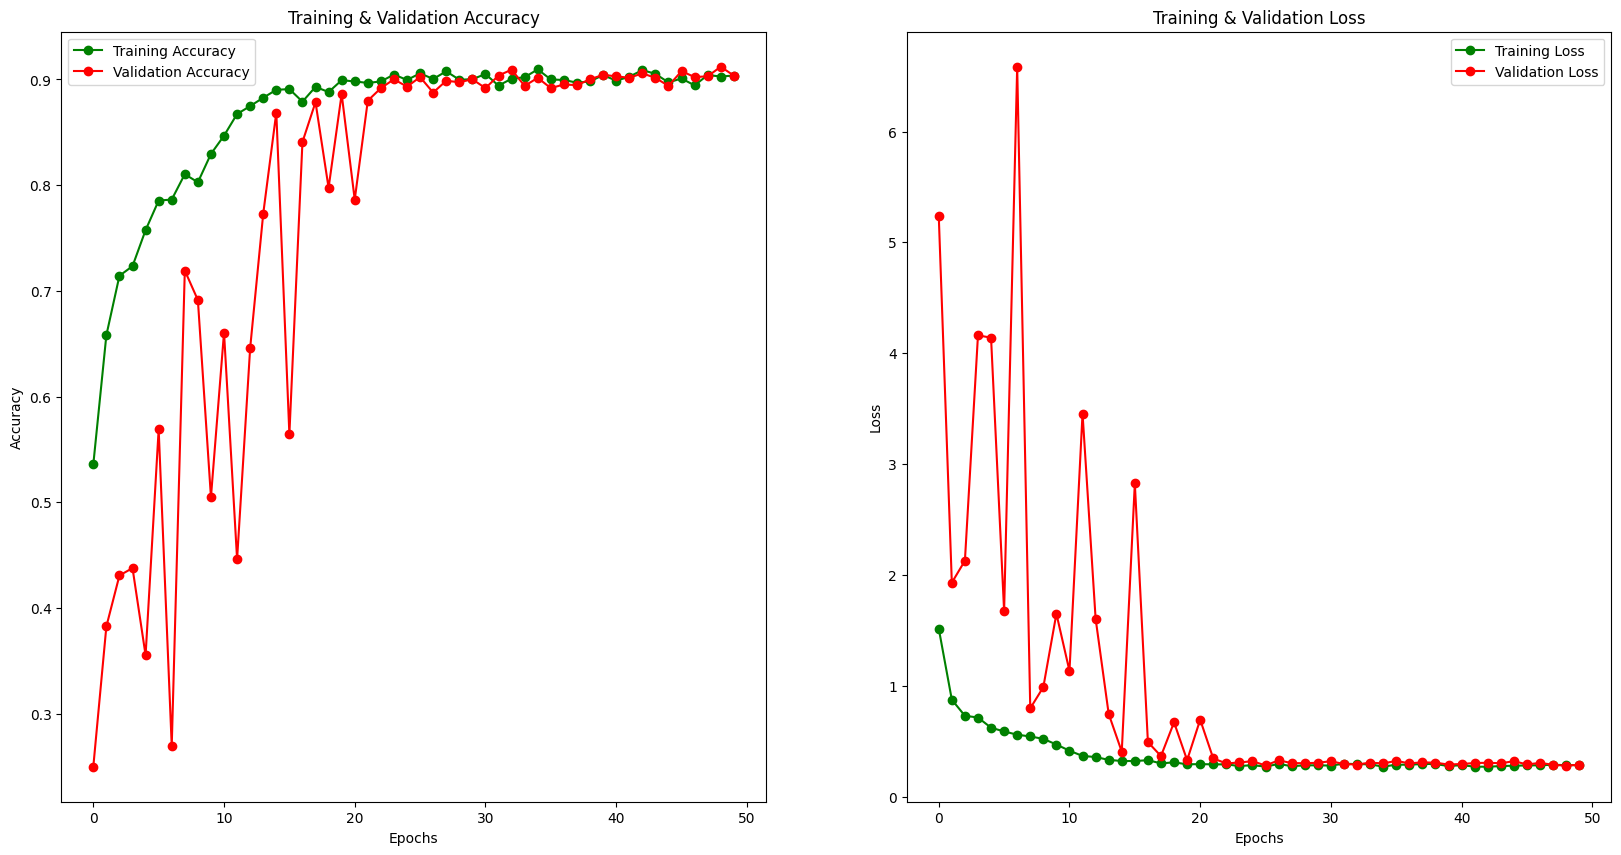

In [ ]:
# 시각화를 위한 코드
epochs = [i for i in range(50)]

# 인공지능의 성능은 정확도 기반의 그래프와 손실 기반의 그래프를 그려주도록 합니다.
fig , ax = plt.subplots(1,2)

# history 변수에 저장된 학습 기록을 변수로 선언합니다.
# 학습 데이터에 대한 학습 기록
train_acc = history.history['accuracy']
train_loss = history.history['loss']

# 검증 데이터에 대한 학습 기록
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

# 그래프 크기를 설정합니다.
fig.set_size_inches(20,10)

# 첫 번째 그래프는 학습(epochs)의 진척에 따른 정확도(train_acc, val_acc) 변화를 보여주는 그래프를 그려줍니다.
ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

# 두 번째 그래프는 학습(epochs)의 진척에 따른 손실(train_loss, val_loss) 변화를 보여주는 그래프를 그려줍니다.
ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
# 테스트 데이터에 대한 예측
# 앞서 model 이라는 변수에 인공지능을 담아두었으며, 해당 변수에 predict() 함수를 활용하여 예측을 수행할 수 있습니다.
predictions = model.predict(x_test)

# 폐렴과 정상 중 더 높게 예측한 경우로 인공지능의 예측 결과를 0 혹은 1로 구분합니다.
predictions = np.argmax(predictions, axis=1)
predictions[:]

45/45 [==============================] - 1s 19ms/step


array([0, 0, 0, ..., 3, 3, 3])

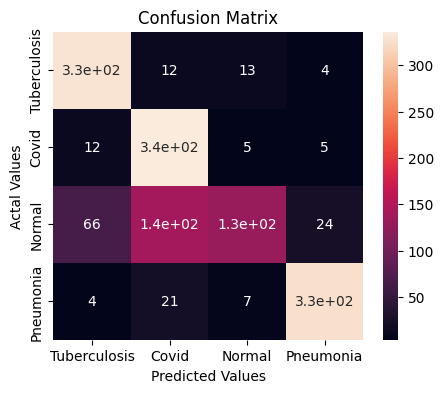

In [ ]:
#Confusion matrix로 시각화하기
cm = confusion_matrix(list(X_test[1]), predictions)
cm_df = pd.DataFrame(cm,
                     index = ['Tuberculosis', 'Covid', 'Normal', 'Pneumonia'],
                     columns = ['Tuberculosis', 'Covid', 'Normal', 'Pneumonia'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()